# Data Collection and Encoding
### This notebook shows examples of how to use the data collection and encoding functions of the 'NDAC' package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import ndac #placeholder for importing our package when it is ready

## Raw data import
The basic raw data should be a colum of a measured experimental values to be used as a metric for classifciation (eg. expression or solubility) and a sequence (eg. amino acid or nucleotide).  The data will be imported as a pandas dataframe so more than the minimum 2 colums is acceptable.

In the example below, there are 6 columns.  The 'conc_cf' (protein experssion level) will be used as the metric and 'nt_seq' will serve as the sequence. 

In [2]:
data = pd.read_csv('../dataframes/DF_prest.csv', index_col=0)
data.head()

,prest_id,uniprot_id,conc_cf,aa_seq,nt_seq,aa_len
0,140095,G3V3N0,4.3075,IMTAPSSFEQFKVAMNYLQLYNVPDCLEDIQDADCSSSKCSSSASS...,GACAAGCTTGCGGCCGCAATTATGACAGCTCCCTCCAGTTTTGAGC...,139
1,140099,G3V537,2.9154,TYYAWKHELLGSGTCPALPPREVLGMEELEKLPEEQVAEEELECSA...,GACAAGCTTGCGGCCGCAACCTACTATGCCTGGAAGCATGAGCTGC...,144
2,140225,P12724,1.4877,SLHARPPQFTRAQWFAIQHISLNPPRCTIAMRAINNYRWRCKNQNT...,GACAAGCTTGCGGCCGCATCACTCCATGCCAGACCCCCACAGTTTA...,136
3,140235,H0YH02,6.7224,ARALNESKRVNNGNTAPEDSSPAKKTRRCQRQESKKMPVAGGKANK...,GACAAGCTTGCGGCCGCAGCGAGAGCATTAAATGAAAGCAAAAGAG...,123
4,140309,F5GYC5,3.3848,HRKEPGARLEATRGAARPHKQGTKPMITRPSVSQLGEGKCPSSQHL...,GACAAGCTTGCGGCCGCACATCGGAAAGAGCCTGGGGCAAGGCTGG...,124


## Data classification
Data that are labeled with an emperimental value as a metric are classified.  There are multiple approaches to this classification possible including calssification of the highest and lowest values based on the first and forth quantiles and ???other method(s) here?????

In [92]:
#define the function for classification here for now... move to .py file once it is working
def quantile_classify(metric, sequence, high_cut=0.75, low_cut=0.25):
    """This function creates a new dataframe containing the specified metric and sequence and computes
    a new column, 'class', based on the high and low cuts"""

    dataframe = pd.concat([metric, sequence], axis=1)
    
    #convert high and low cut quantiles into values based on the values of the metric
    low_cut = metric.quantile(low_cut)
    high_cut = metric.quantile(high_cut)
    
    #make a histogram of the data to show the locations of the cut points
    hist = metric.hist(bins=100)
    plt.axvline(low_cut, color='k', linestyle='dashed', linewidth=3)
    plt.axvline(high_cut, color='r', linestyle='dashed', linewidth=3)
    
    #function to assign class based on high and low cut
    def assign_class(metric):
        if metric <= low_cut:
            return 0
        elif metric >= high_cut:
            return 1
        return
    #apply to the dataframe then remove values not assigned a calss
    dataframe['class'] = dataframe.iloc[:,0].apply(assign_class)
    dataframe = dataframe[pd.notnull(dataframe['class'])]
    
    counts = pd.value_counts(dataframe['class'])
    print(len(metric),"samples input.")
    print(counts[1],"samples above high cut,", counts[0], "samples below low cut,",
          len(metric) - len(dataframe), "samples removed.")
    
    
    return dataframe, hist

45206 samples input.
9050 samples above high cut, 9065 samples below low cut, 27091 samples removed.


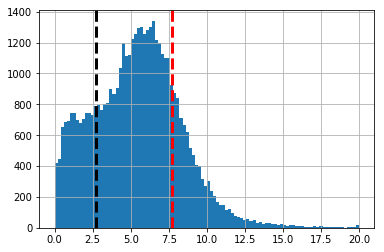

In [95]:
dataframe, hist = quantile_classify(data['conc_cf'], data['nt_seq'], high_cut=0.8, low_cut=0.2)